<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io
from __future__ import print_function
import argparse
import cv2
import matplotlib.pyplot as plt
import numpy as np

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


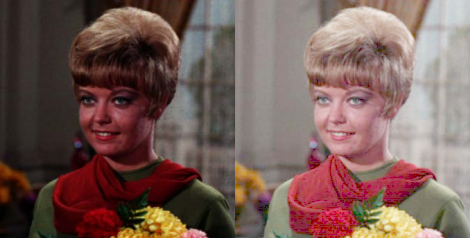

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
  gamma = float(input('Masukkan nilai Gamma: '))
  img_1 = cv2.imread('/content/drive/MyDrive/PCVK/Images/girl.png')
  img_3 = np.array(255*(img_1/255)**(1/gamma), dtype='uint8')
  frame = cv2.hconcat((img_1, img_3))
  cv2_imshow(frame)
except ValueError:
  print('Error, not a number')
 

 Depth pada citra 
----------------------------------
Masukkan nilai Depth: 15


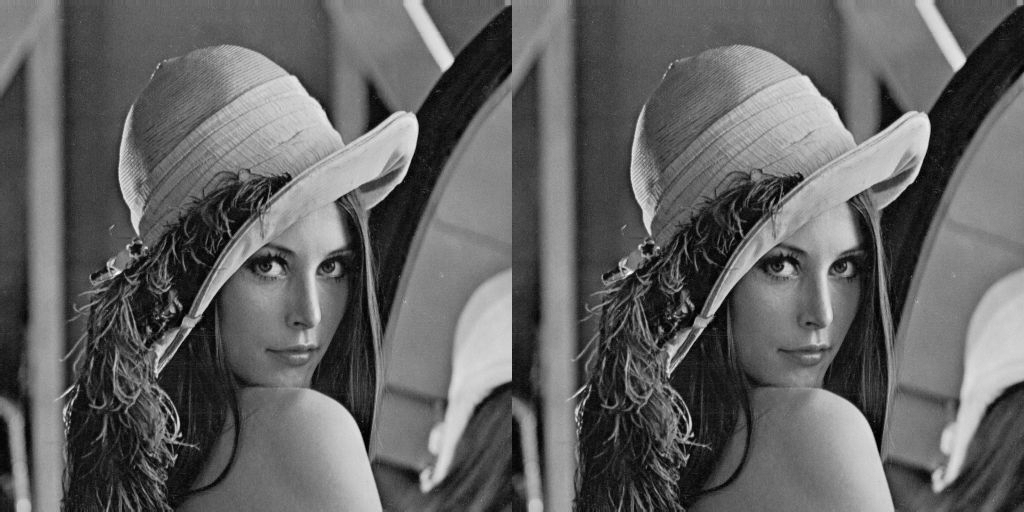

In [85]:
print(' Depth pada citra ')
print('----------------------------------')
try:
  depth = float(input('Masukkan nilai Depth: '))
  level = 255/(2**depth-1)
  img_1 = cv2.imread('/content/drive/MyDrive/PCVK/Images/lenaTest3.png')
  img_3 = np.zeros(img_1.shape, img_1.dtype)

  for x in range(img_1.shape[0]):
    for y in range(img_1.shape[1]):
      for z in range(img_1.shape[2]):
        correction = round((img_1[x,y,z]/level))*level
        img_3[x,y,z] = np.clip(correction,0,255)
  frame = cv2.hconcat((img_1, img_3))
  cv2_imshow(frame)
except ValueError:
  print('Error, not a number')

100


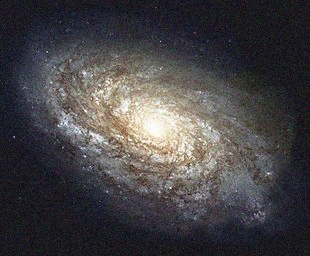

24.131198464651863


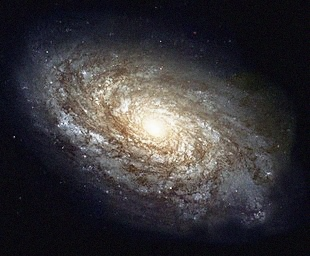

21.028939022374566


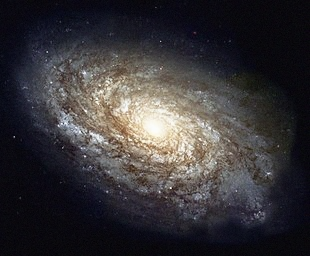

20.67647768040637


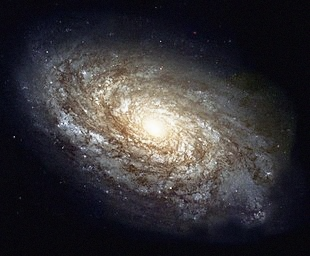

20.432334561852787


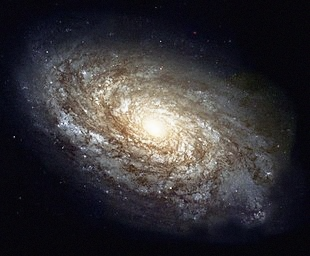

20.18151664466341


In [34]:
import glob
import math
path = "/content/drive/MyDrive/PCVK/Images/100noise/*.jpg"
cv_img = glob.glob(path)
cv_img.sort()

def PSNR(img1, img2):
  mse = np.mean((img1 - img2) ** 2)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 0
  psnr = 20 * math.log10(max_pixel/math.sqrt(mse))
  print(psnr)

def avg(n):
  temp = cv2.imread(cv_img[0])
  sum_arr = np.zeros(temp.shape).astype(np.float)
  for file in cv_img[0:n]:
    img = cv2.imread(file).astype(float)
    sum_arr = sum_arr + img
  denoised = sum_arr / n
  output = cv2.normalize(denoised, None, 0 , 255, cv2.NORM_MINMAX)
  cv2_imshow(output)
  PSNR(output, temp)

avg(5)
avg(30)
avg(60)
avg(80)
avg(100)

406 310


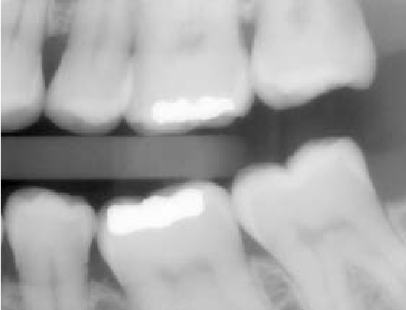

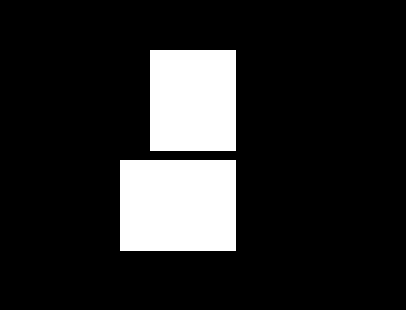

nand


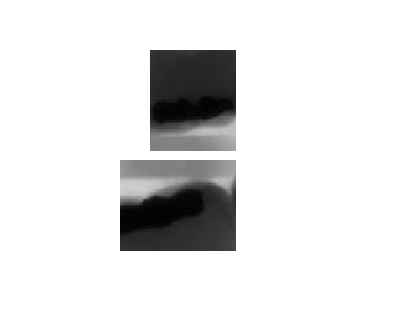

In [92]:
image = cv2.imread('/content/drive/MyDrive/PCVK/Images/teeth.jpg')

width = int(image.shape[1] * 30 / 100)
height = int(image.shape[0] * 30 / 100)
print(width, height)
dim = (width, height)

img_resized = cv2.resize(image, dim) 
cv2_imshow(img_resized)# a mask is the same size as our image, but has only two pixel
# values, 0 and 255 -- pixels with a value of 0 (background) are
# ignored in the original image while mask pixels with a value of
# 255 (foreground) are allowed to be kept
mask = np.zeros(img_resized.shape, img_resized.dtype)
mask1 = cv2.rectangle(mask, (235, 150), (150, 50), [255,255,255], -1)
mask2 = cv2.rectangle(mask1, (235, 250), (120, 160), [255,255,255], -1)
cv2_imshow(mask)
# apply our mask -- notice how only the person in the image is
# cropped out
# print('or')
# masked = cv2.bitwise_or(img_resized, mask)
# cv2_imshow(masked)
# print('not')
# masked1 = cv2.bitwise_not(img_resized, mask)
# cv2_imshow(masked1)
# print('xor')
# masked2 = cv2.bitwise_xor(img_resized, mask)
# cv2_imshow(masked2)
print('nand')
masked3 = cv2.bitwise_not(cv2.bitwise_and(img_resized, mask), mask)
cv2_imshow(masked3)
# print('and')
# masked4 = cv2.bitwise_and(img_resized, mask)
# cv2_imshow(masked4)